<a href="https://colab.research.google.com/github/yashraj195/Stock_Analysis_ZD/blob/main/EDA_AND_MODEL_EVALUATION_FOR_STOCK_MARKET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**As the third member of our group project, I was responsible for performing Exploratory Data Analysis (EDA) on the Microsoft stock dataset. I generated line charts to visualize price trends such as closing price and trading volume, and created correlation heatmaps to understand relationships among features. I analyzed monthly and yearly returns along with volatility to assess risk and performance. Additionally, I implemented rolling averages and moving window functions to observe long-term trends and smoothing effects in stock prices.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Microsoft_Stock.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

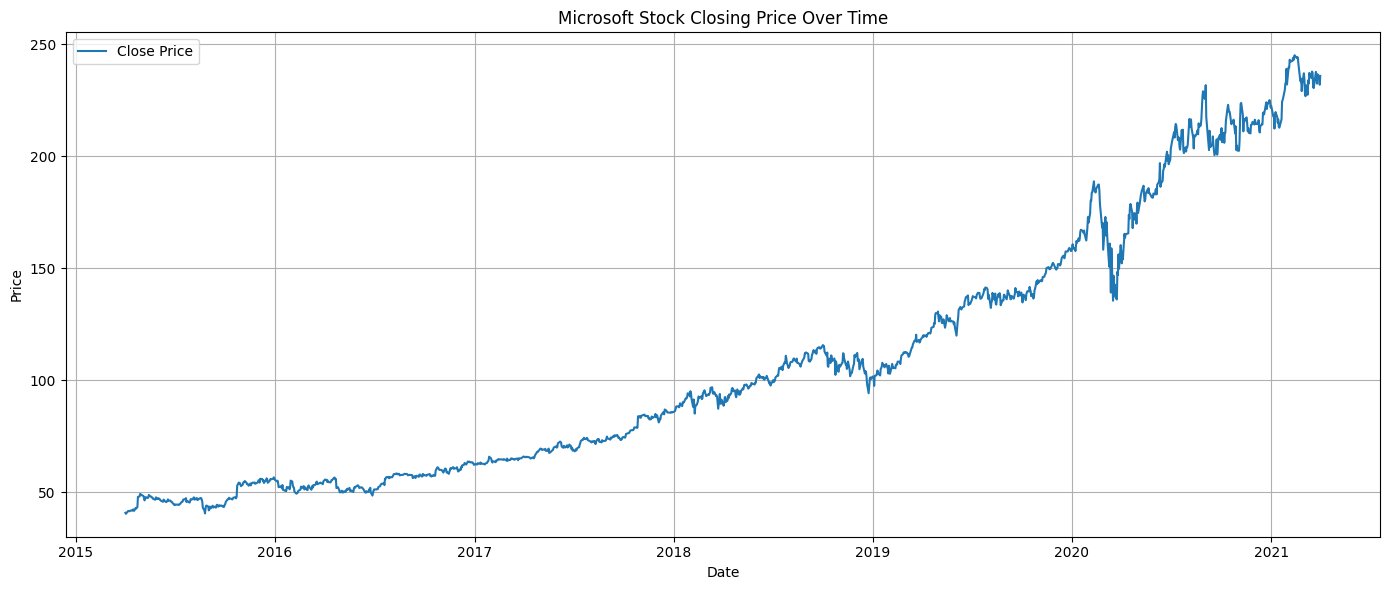

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.title("Microsoft Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

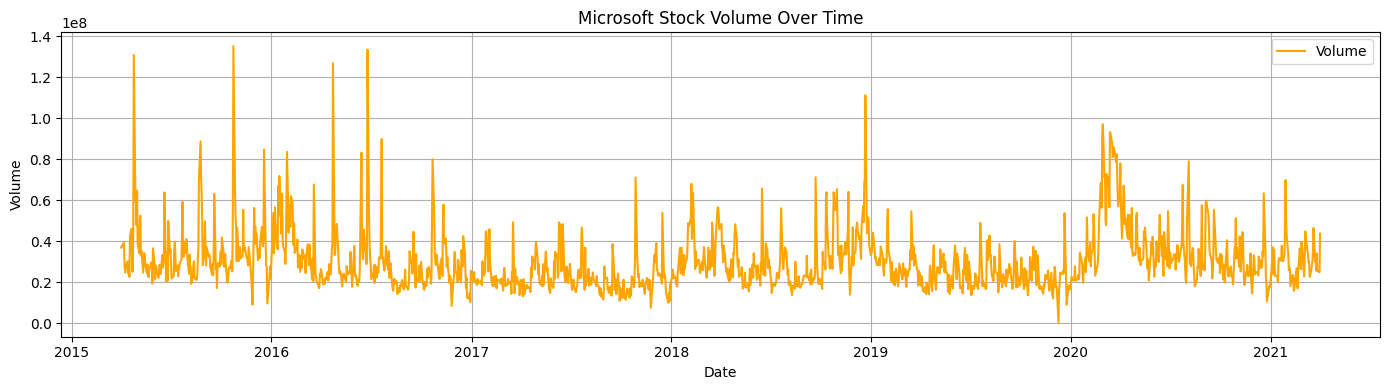

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df['Volume'], color='orange', label='Volume')
plt.title("Microsoft Stock Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


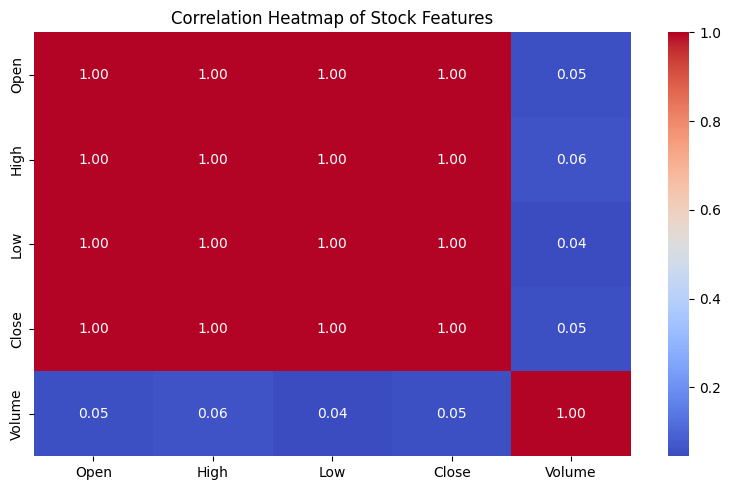

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Stock Features")
plt.tight_layout()
plt.show()

In [ ]:
monthly_returns = df['Close'].resample('M').ffill().pct_change()
yearly_returns = df['Close'].resample('Y').ffill().pct_change()


<ipython-input-24-5309bc738f9f>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df['Close'].resample('M').ffill().pct_change()
<ipython-input-24-5309bc738f9f>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = df['Close'].resample('Y').ffill().pct_change()


In [ ]:
monthly_returns = df['Close'].resample('M').ffill().pct_change()
monthly_volatility = df['Close'].resample('M').std()

<ipython-input-25-79d8a7d46580>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df['Close'].resample('M').ffill().pct_change()
<ipython-input-25-79d8a7d46580>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = df['Close'].resample('M').std()


In [ ]:
yearly_returns = df['Close'].resample('Y').ffill().pct_change()
yearly_volatility = df['Close'].resample('Y').std()

<ipython-input-26-fb6869e15ead>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = df['Close'].resample('Y').ffill().pct_change()
<ipython-input-26-fb6869e15ead>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_volatility = df['Close'].resample('Y').std()


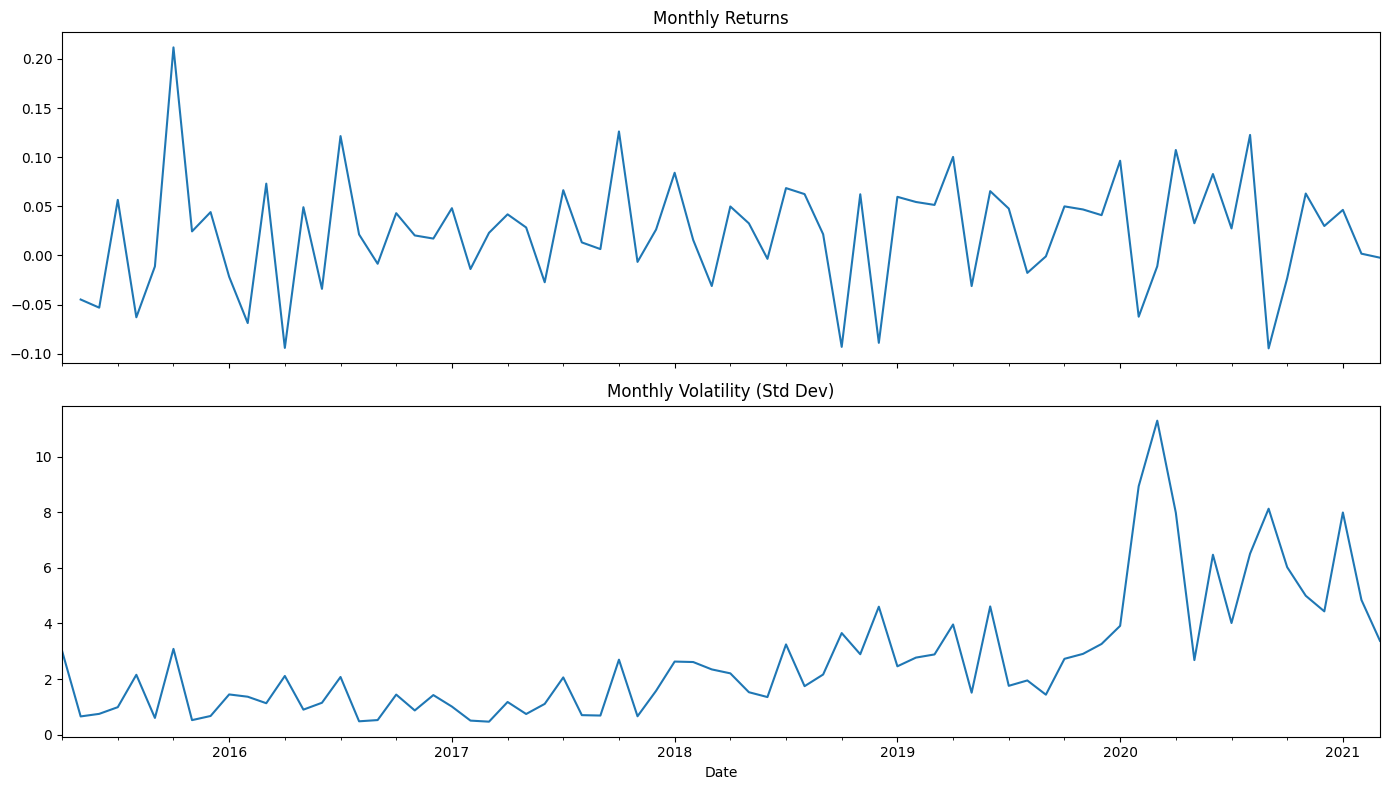

In [ ]:
# Plot Monthly Returns and Volatility
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
monthly_returns.plot(ax=ax[0], title='Monthly Returns')
monthly_volatility.plot(ax=ax[1], title='Monthly Volatility (Std Dev)')
plt.tight_layout()
plt.show()

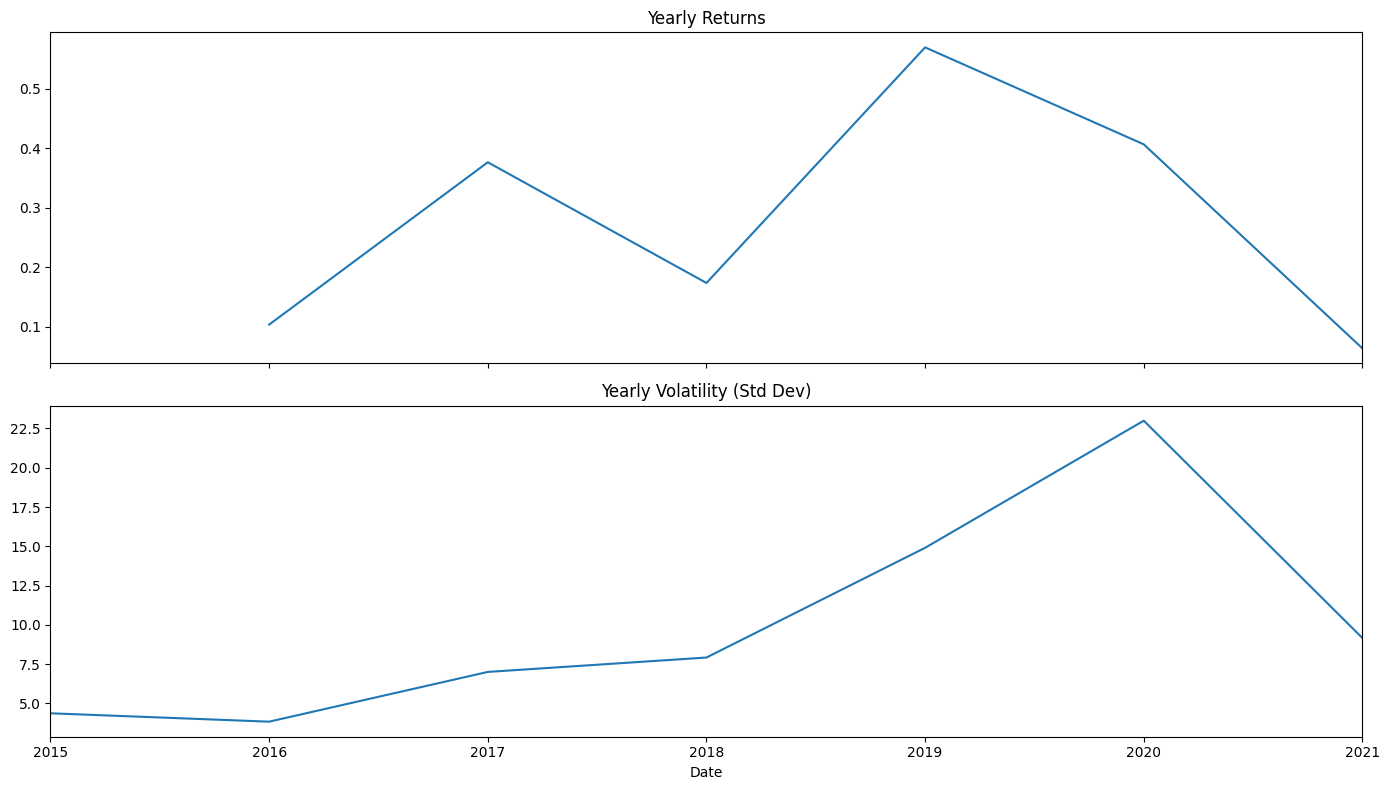

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
yearly_returns.plot(ax=ax[0], title='Yearly Returns')
yearly_volatility.plot(ax=ax[1], title='Yearly Volatility (Std Dev)')
plt.tight_layout()
plt.show()

In [ ]:
df['Rolling_50'] = df['Close'].rolling(window=50).mean()
df['Rolling_200'] = df['Close'].rolling(window=200).mean()

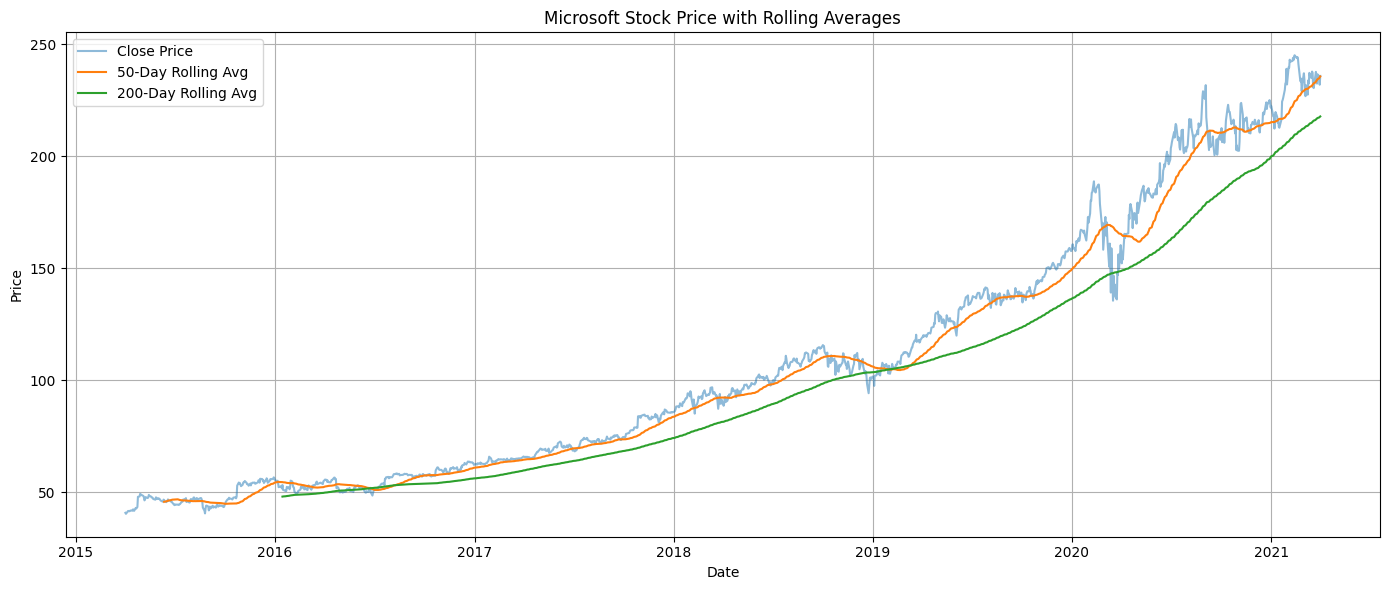

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Rolling_50'], label='50-Day Rolling Avg')
plt.plot(df['Rolling_200'], label='200-Day Rolling Avg')
plt.title("Microsoft Stock Price with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Task-6

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Rolling_50', 'Rolling_200'], dtype='object')

In [ ]:
train_size=int(len(df)*0.8)
train_data,test_data=df['Close'][:train_size],df['Close'][train_size:]

In [ ]:
model=ARIMA(train_data,order=(5,1,0))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
train_pred=model_fit.predict(start=0,end=len(train_data)-1)
test_pred=model_fit.predict(start=len(train_data),end=len(df)-1,typ='levels')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
rmse=np.sqrt(mean_squared_error(test_data,test_pred))
mae=mean_absolute_error(test_data,test_pred)
mape=mean_absolute_error(test_data,test_pred)

In [ ]:
print("RMSE:",rmse)
print("MAE:",mae)
print("MAPE:",mape)

RMSE: 44.669167387474
MAE: 39.01873566507202
MAPE: 39.01873566507202


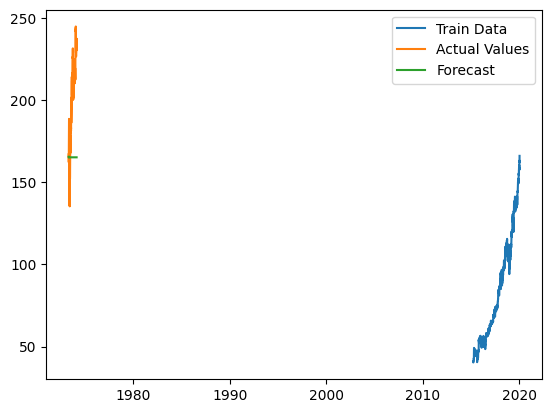

In [ ]:
plt.plot(train_data,label='Train Data')
plt.plot(np.arange(len(train_data),len(df)),test_data,label='Actual Values')
plt.plot(np.arange(len(train_data),len(df)),test_pred,label='Forecast')
plt.legend()
plt.show()

In [ ]:
future_pred=model_fit.forecast(steps=12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


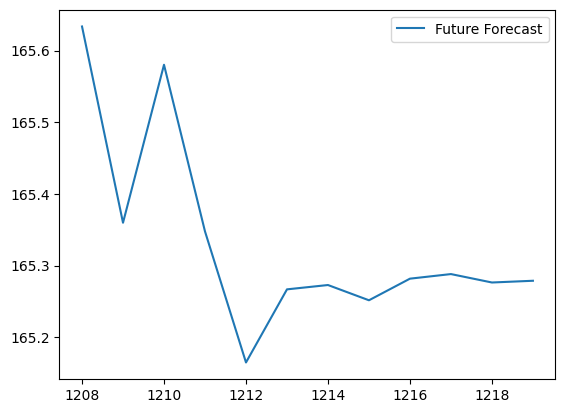

In [ ]:
plt.plot(future_pred,label='Future Forecast')
plt.legend()
plt.show()